In [24]:
import pandas as pd

data = pd.read_csv('integrated_workout_data.csv')
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
date_start = pd.to_datetime('2023-05-30 00:00:00+00:00')
date_end = pd.to_datetime('2024-05-30 00:00:00+00:00')
data = data.loc[(data['Timestamp']>=date_start) & (data['Timestamp']<=date_end)]

print(data.head())

                       Timestamp   Latitude  Longitude   Elevation     Speed  \
359686 2023-06-01 09:09:06+00:00  37.986286  23.909945  120.607999  1.629446   
359687 2023-06-01 09:09:07+00:00  37.986273  23.909938  120.712788  1.560308   
359688 2023-06-01 09:09:08+00:00  37.986261  23.909930  120.800310  1.390064   
359689 2023-06-01 09:09:09+00:00  37.986250  23.909923  120.873467  1.413677   
359690 2023-06-01 09:09:10+00:00  37.986237  23.909917  120.936883  1.455680   

            Course  HeartRate   duration  totalEnergyBurned Activity  
359686  206.381492    109.000  43.262739                0.0  walking  
359687  205.855530    109.000  43.262739                0.0  walking  
359688  207.366817    117.718  43.262739                0.0  walking  
359689  201.764140    117.718  43.262739                0.0  walking  
359690  199.097956    117.718  43.262739                0.0  walking  


In [25]:
summary = data.describe()
print(summary)


            Latitude      Longitude      Elevation          Speed  \
count  286005.000000  286005.000000  286005.000000  286005.000000   
mean       46.072349      13.262074      22.972026       1.333600   
std         6.761460       9.195723      43.747366       1.378341   
min        37.969378       3.563862     -66.629044       0.000000   
25%        39.353534       4.868776       0.339592       0.828638   
50%        52.088686       4.947083       3.264605       1.241567   
75%        52.328298      22.955022      10.363118       1.478360   
max        52.393409      24.013424     216.605615      35.041068   

              Course      HeartRate       duration  totalEnergyBurned  
count  286005.000000  286005.000000  286005.000000           286005.0  
mean      184.722111     112.658122      59.037469                0.0  
std       100.750900      12.282217      34.560165                0.0  
min        -1.000000      71.057000       4.492327                0.0  
25%       104.7124

In [43]:
print(f"Row count: {data.shape[0]} \n")
print(f"Column count: {data.shape[1]}")

Row count: 256281 

Column count: 10


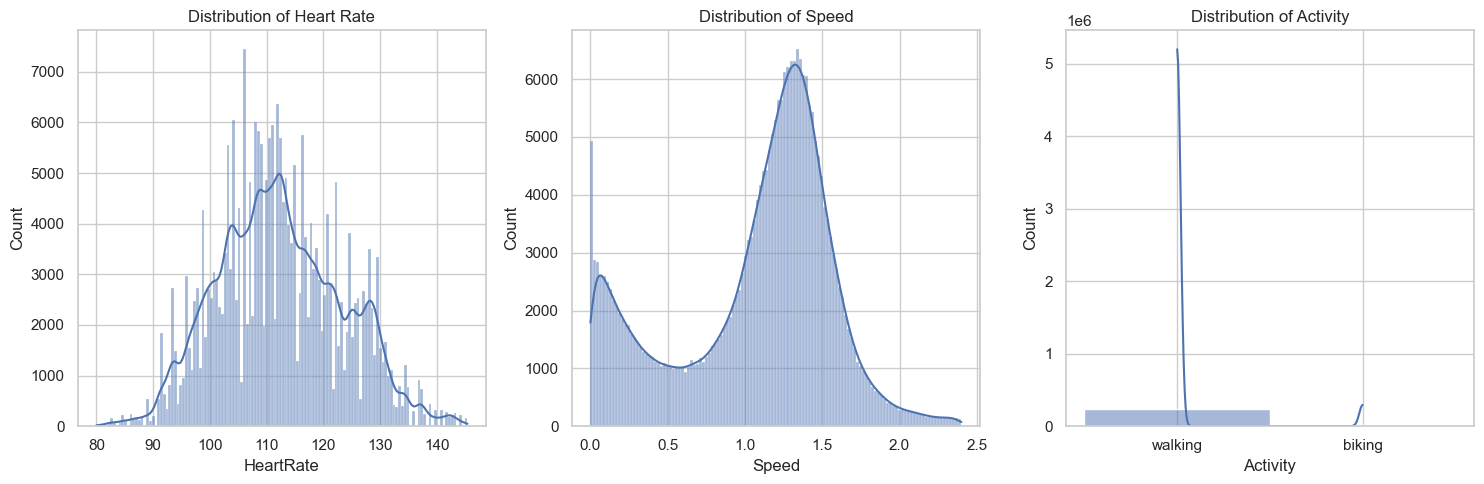

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['HeartRate'], kde=True)
plt.title('Distribution of Heart Rate')

plt.subplot(1, 3, 2)
sns.histplot(data['Speed'], kde=True)
plt.title('Distribution of Speed')

plt.subplot(1, 3, 3)
sns.histplot(data['Activity'], kde=True)
plt.title('Distribution of Activity')

plt.tight_layout()
file_name = f"graphs/distOfData.png"
plt.savefig(file_name)
plt.show()


In [46]:
plt.plot(data.Timestamp,data.HeartRate)
plt.xlabel('Timestamp')
plt.ylabel('Heart rate')
plt.title('Heart rate over time plot')
file_name = f"graphs/heartRateOverTime.png"
plt.savefig(file_name)

plt.clf()


<Figure size 640x480 with 0 Axes>

In [28]:
# Ratio per activies summary
print(f"biking entries: {data['Activity'].value_counts()['biking']}")
print(f"walking entries: {data['Activity'].value_counts()['walking']}")
print(f"running entries: {data['Activity'].value_counts()['running']}")
# print(f"running entries: {data['Activity'].value_counts()['unknown']}")


biking entries: 35224
walking entries: 250780
running entries: 1


In [29]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Year/Week'] = data['Timestamp'].apply(lambda x: "%d/%d" % (x.year, x.week))
data.head()
pd.options.display.width = 0
f = open("groupedActivity.txt", "w")
f.write(data.groupby(['Year/Week', 'Activity']).size().to_string())
f.close()


                   Latitude  Longitude  Elevation     Speed    Course  \
Latitude           1.000000  -0.997872  -0.599813  0.100172 -0.097269   
Longitude         -0.997872   1.000000   0.580576 -0.095906  0.104004   
Elevation         -0.599813   0.580576   1.000000 -0.050404 -0.058435   
Speed              0.100172  -0.095906  -0.050404  1.000000 -0.005385   
Course            -0.097269   0.104004  -0.058435 -0.005385  1.000000   
HeartRate         -0.232416   0.239340   0.165106  0.202064  0.055140   
duration           0.001629  -0.007536   0.100270 -0.177162 -0.022748   
totalEnergyBurned       NaN        NaN        NaN       NaN       NaN   

                   HeartRate  duration  totalEnergyBurned  
Latitude           -0.232416  0.001629                NaN  
Longitude           0.239340 -0.007536                NaN  
Elevation           0.165106  0.100270                NaN  
Speed               0.202064 -0.177162                NaN  
Course              0.055140 -0.022748    

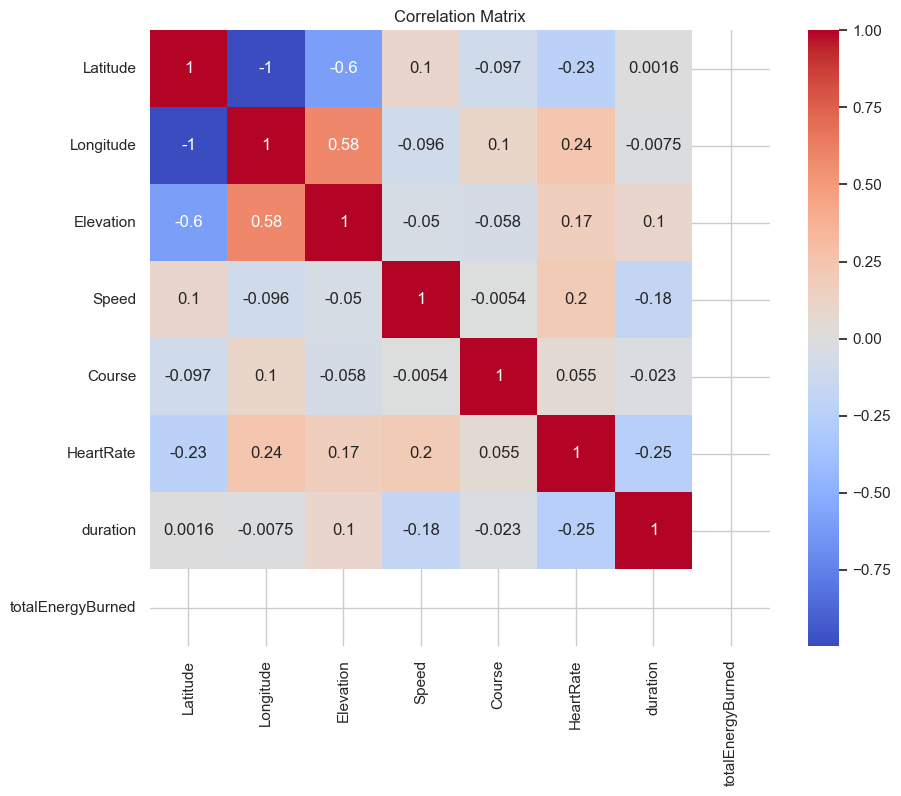

In [30]:
numeric_columns = ['Latitude', 'Longitude', 'Elevation', 'Speed', 'Course', 'HeartRate', 'duration', 'totalEnergyBurned']
correlation_matrix = data[numeric_columns].corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [31]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)


Timestamp            0
Latitude             0
Longitude            0
Elevation            0
Speed                0
Course               0
HeartRate            0
duration             0
totalEnergyBurned    0
Activity             0
Year/Week            0
dtype: int64


In [32]:
data['HeartRate'].fillna(data['HeartRate'].mean(), inplace=True)
data['Speed'].fillna(data['Speed'].mean(), inplace=True)
data['Elevation'].fillna(data['Elevation'].mean(), inplace=True)


In [33]:
data.dropna(thresh=len(data.columns) - 2, inplace=True)


In [35]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    return df

In [36]:
data = remove_outliers(data, 'HeartRate')
data = remove_outliers(data, 'Speed')

In [37]:
data = remove_outliers(data, 'Course')

In [38]:
summary = data.describe()
print(summary)

            Latitude      Longitude      Elevation          Speed  \
count  256281.000000  256281.000000  256281.000000  256281.000000   
mean       45.464098      14.077053      24.923701       1.067522   
std         6.778494       9.231667      45.005898       0.511063   
min        37.969378       3.563862     -66.629044       0.000000   
25%        39.350756       4.869284       0.492327       0.786512   
50%        40.059767      20.704828       3.753202       1.205112   
75%        52.325066      22.957946      11.531688       1.410213   
max        52.393409      24.013424     216.605615       2.399992   

              Course      HeartRate       duration  totalEnergyBurned  
count  256281.000000  256281.000000  256281.000000           256281.0  
mean      186.056351     112.397421      61.161673                0.0  
std       100.677242      10.950048      34.435577                0.0  
min        -1.000000      80.000000       4.492327                0.0  
25%       106.0251

In [39]:
data.drop(columns=['totalEnergyBurned'], inplace=True)

In [40]:
data.head(100)

,Timestamp,Latitude,Longitude,Elevation,Speed,Course,HeartRate,duration,Activity,Year/Week
359686,2023-06-01 09:09:06+00:00,37.986286,23.909945,120.607999,1.629446,206.381492,109.000,43.262739,walking,2023/22
359687,2023-06-01 09:09:07+00:00,37.986273,23.909938,120.712788,1.560308,205.855530,109.000,43.262739,walking,2023/22
359688,2023-06-01 09:09:08+00:00,37.986261,23.909930,120.800310,1.390064,207.366817,117.718,43.262739,walking,2023/22
359689,2023-06-01 09:09:09+00:00,37.986250,23.909923,120.873467,1.413677,201.764140,117.718,43.262739,walking,2023/22
359690,2023-06-01 09:09:10+00:00,37.986237,23.909917,120.936883,1.455680,199.097956,117.718,43.262739,walking,2023/22
...,...,...,...,...,...,...,...,...,...,...
359788,2023-06-01 09:10:47+00:00,37.985765,23.910610,120.554329,1.513851,41.412356,117.718,43.262739,walking,2023/22
359789,2023-06-01 09:10:48+00:00,37.985778,23.910621,120.516646,1.805767,32.636343,117.718,43.262739,walking,2023/22
359790,2023-06-01 09:10:49+00:00,37.985792,23.910633,120.495201,2.014026,30.469335,117.718,43.262739,walking,2023/22
359791,2023-06-01 09:10:50+00:00,37.985806,23.910643,120.486322,1.575084,32.928206,117.718,43.262739,walking,2023/22


NameError: name '_df_10' is not defined

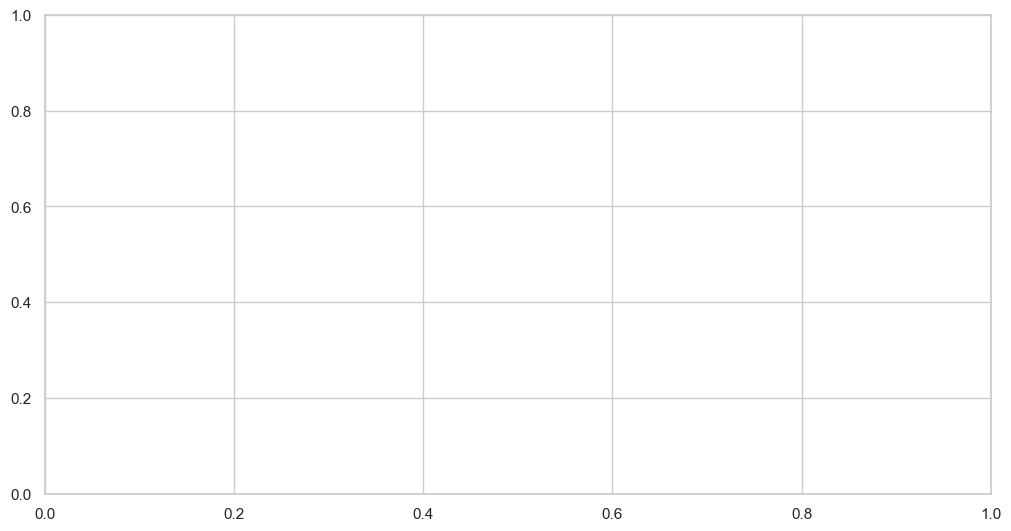

In [42]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['HeartRate']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('HeartRate')

In [ ]:
unique_activities = data['Activity'].unique()

In [ ]:
unique_activities

array(['biking', 'unknown', 'walking'], dtype=object)